# Evaluation Report

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from src.dataset.dataset import CocoDataset
from src.engine.models import ResNetClassifier
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, recall_score, precision_score, accuracy_score, f1_score

Set dataset and model variables

In [2]:
experiment = "resnet_vanilla"

model_path = f"/home/joaoherrera/server/datasets/screws/experiments/{experiment}/checkpoint.pth"
model = ResNetClassifier(model_path)
model.load()
model.to(torch.device("cuda:0"))

dataset_annotations_path = f"/home/joaoherrera/server/datasets/screws/experiments/{experiment}/validation_annotations.json"
dataset_images_path = "/home/joaoherrera/server/datasets/screws/images/"
dataset = CocoDataset(dataset_images_path, dataset_annotations_path)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

Dataset categories: ['1: screw', '2: anomalous_screw']
Number of images: 305
Number of Annotations: 305
Per-category info:
Category Label: screw 	 Category ID: 1
Instances: 120
Category Label: anomalous_screw 	 Category ID: 2
Instances: 185


Run model over the input images.

In [3]:
preds = []
truths = []

model.eval()

with torch.no_grad():
    for batch in dataloader:
        x_pred, y_true = batch
        x_pred = x_pred.to("cuda:0")
        
        y_pred = model(x_pred)
        
        preds.append(y_pred.cpu().detach().numpy()[0])
        truths.append(y_true.cpu().detach().numpy()[0])

Compute evaluation metrics.

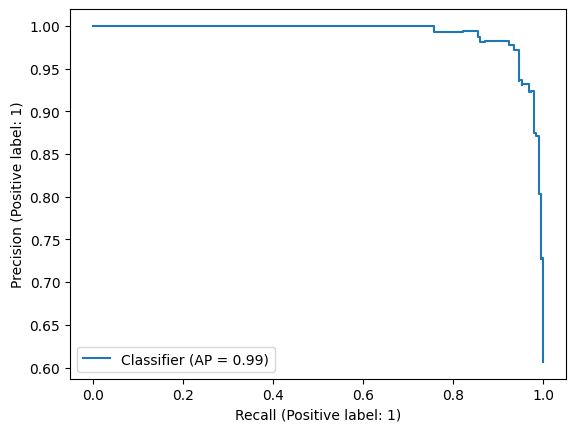

In [4]:
PrecisionRecallDisplay.from_predictions(truths, preds)

plt.show()

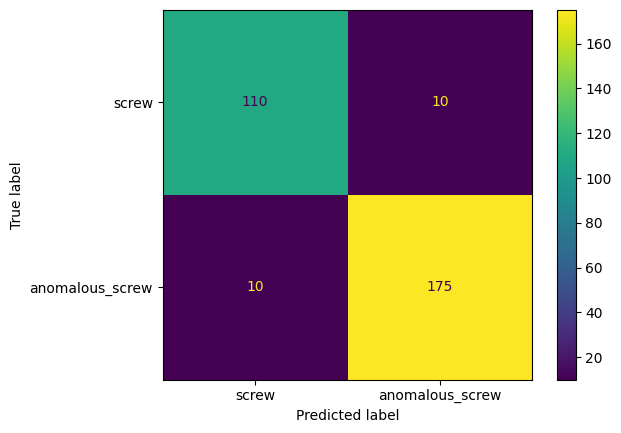

In [5]:
truths_classes = np.array(truths, dtype=np.uint8)
preds_classes = np.array(np.round(preds), dtype=np.uint8)

conf_mat = confusion_matrix(truths_classes, preds_classes, labels=[0, 1])
ConfusionMatrixDisplay(conf_mat, display_labels=["screw", "anomalous_screw"]).plot()

plt.show()

In [6]:
precision = precision_score(truths_classes, preds_classes)
recall = recall_score(truths_classes, preds_classes)
accuracy = accuracy_score(truths_classes, preds_classes)
f1score = f1_score(truths_classes, preds_classes)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1score}")

Precision: 0.9459459459459459
Recall: 0.9459459459459459
Accuracy: 0.9344262295081968
F1 Score: 0.9459459459459459


Visualize some predictions

Prediction: 1.0 / Ground Truth: 1.0


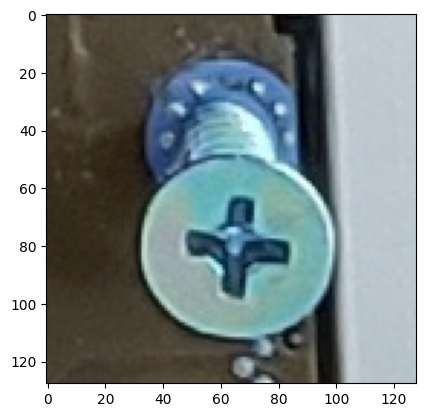

In [29]:
random_index = np.random.randint(0, len(dataset))
image, ground_truth = dataset[random_index]
image = image.unsqueeze(0)
image = image.to("cuda:0")

y_pred = model(image)
y_pred = y_pred.cpu().detach().numpy()[0]
y_pred = np.round(y_pred)

image = image.cpu().detach().numpy()[0]
image = image.transpose(1, 2, 0)
image = image.astype(int)

print(f"Prediction: {y_pred} / Ground Truth: {ground_truth}")

plt.imshow(image)
plt.show()